In [1]:
import warnings
import intake
import xarray as xr
import proplot as plot
import matplotlib.pyplot as plt
import pandas as pd
import cftime

warnings.filterwarnings('ignore')

# Fetching data from CMIP6 archive

In [2]:
url = "https://raw.githubusercontent.com/NCAR/intake-esm-datastore/master/catalogs/pangeo-cmip6.json"
dataframe = intake.open_esm_datastore(url)

In [3]:
type(dataframe)

intake_esm.core.esm_datastore

In [4]:
dataframe.df.head()

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,ps,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
1,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rsds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
2,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlus,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
3,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
4,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,psl,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706


In [5]:
models = dataframe.search(experiment_id="historical",
                          variable_id="pr",
                          institution_id="MOHC",
                          member_id="r1i1p1f2")

models

,unique
activity_id,1
institution_id,1
source_id,1
experiment_id,1
member_id,1
table_id,2
variable_id,1
grid_label,1
zstore,2
dcpp_init_year,0


In [8]:
%pip install gcsfs

  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
     |████████████████████████████████| 106 kB 1.4 MB/s eta 0:00:01
     |████████████████████████████████| 155 kB 1.7 MB/s eta 0:00:01
     |████████████████████████████████| 574 kB 1.4 MB/s eta 0:00:01
     |████████████████████████████████| 121 kB 1.4 MB/s eta 0:00:01
  Using cached multidict-5.2.0-cp39-cp39-macosx_10_9_x86_64.whl (45 kB)
     |████████████████████████████████| 81 kB 1.8 MB/s eta 0:00:01
  Using cached cachetools-4.2.4-py3-none-any.whl (10 kB)
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached pyasn1-0.4.8-py2.py3-none-any.whl (77 kB)
  Using cached requests_oauthlib-1.3.0-py2.py3-none-any.whl (23 kB)
  Using cached oauthlib-3.1.1-py2.py3-none-any.whl (146 kB)
     |████████████████████████████████| 109 kB 1.6 MB/s eta 0:00:01
     |████████████████████████████████| 75 kB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 1.6 MB/s eta 0:00:01
  Using

In [9]:
datasets = models.to_dataset_dict()


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In this address: `activity_id.institution_id.source_id.experiment_id.table_id.grid_label`, 
- `source_id` is the model
- `experiment_id` is the experiment
- `table_id` is the temporal frequency

Let's choose the "Amon" entry: monthly atmospheric data.

In [10]:
datasets.keys()

dict_keys(['CMIP.MOHC.UKESM1-0-LL.historical.day.gn', 'CMIP.MOHC.UKESM1-0-LL.historical.Amon.gn'])

In [11]:
ds = datasets["CMIP.MOHC.UKESM1-0-LL.historical.Amon.gn"]
ds

<xarray.Dataset>
Dimensions:    (lat: 144, bnds: 2, lon: 192, member_id: 1, time: 1980)
Coordinates:
  * lat        (lat) float64 -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(144, 2), meta=np.ndarray>
  * lon        (lon) float64 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(192, 2), meta=np.ndarray>
  * time       (time) object 1850-01-16 00:00:00 ... 2014-12-16 00:00:00
    time_bnds  (time, bnds) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
  * member_id  (member_id) <U8 'r1i1p1f2'
Dimensions without coordinates: bnds
Data variables:
    pr         (member_id, time, lat, lon) float32 dask.array<chunksize=(1, 600, 144, 192), meta=np.ndarray>
Attributes: (12/51)
    Conventions:             CF-1.7 CMIP-6.2
    activity_id:             CMIP
    branch_method:           standard
    branch_time_in_child:    0.0
    branch_time_in_parent:   144000.0
    cmor_version:            3.4.0
    ...                      ...
    variant_label:           r1i1p1f2
    status:                  2019-10-25;created;by nhn2@columbia.edu
    netcdf_tracking_ids:     hdl:21.14100/f35b8979-27a3-4e33-9708-43fb5001fb9...
    version_id:              v20190406
    intake_esm_varname:      ['pr']
    intake_esm_dataset_key:  CMIP.MOHC.UKESM1-0-LL.historical.Amon.gn

In [12]:
df = ds.to_dataframe()

# Understanding the data

In this data, there is one entry for each month's precipitation, for each combination of latitude and longitude.

The latitude varies from -89.375 to 89.375 in 1.25 degree increments (143 values in total).

The longitude varies from 0.975 to 359.0625 in 1.875 degree increments (192 values times 2 bands, 384 in total).

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 109486080 entries, (-89.375, 0, 0.9375, 'r1i1p1f2', cftime.Datetime360Day(1850, 1, 16, 0, 0, 0, 0, has_year_zero=True)) to (89.375, 1, 359.0625, 'r1i1p1f2', cftime.Datetime360Day(2014, 12, 16, 0, 0, 0, 0, has_year_zero=True))
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   lat_bnds   float64
 1   lon_bnds   float64
 2   pr         float32
 3   time_bnds  object 
dtypes: float32(1), float64(2), object(1)
memory usage: 3.7+ GB


For each degree of latitude, we have 760,320 measurements, because there are 1980 precipitation measurements for each of the 384 values of longitude.

One precipitation measurement per month, for 1980 months ranging from 01/1850 to 12/2014:

In [54]:
df.head(13)

lat_bnds  lon_bnds  \
lat     bnds lon    member_id time                                      
-89.375 0    0.9375 r1i1p1f2  1850-01-16 00:00:00     -90.0       0.0   
                              1850-02-16 00:00:00     -90.0       0.0   
                              1850-03-16 00:00:00     -90.0       0.0   
                              1850-04-16 00:00:00     -90.0       0.0   
                              1850-05-16 00:00:00     -90.0       0.0   
                              1850-06-16 00:00:00     -90.0       0.0   
                              1850-07-16 00:00:00     -90.0       0.0   
                              1850-08-16 00:00:00     -90.0       0.0   
                              1850-09-16 00:00:00     -90.0       0.0   
                              1850-10-16 00:00:00     -90.0       0.0   
                              1850-11-16 00:00:00     -90.0       0.0   
                              1850-12-16 00:00:00     -90.0       0.0   
                              1851-01-16 00:00:00     -90.0       0.0   

                                                             pr  \
lat     bnds lon    member_id time                                
-89.375 0    0.9375 r1i1p1f2  1850-01-16 00:00:00  2.528526e-06   
                              1850-02-16 00:00:00  1.196780e-06   
                              1850-03-16 00:00:00  3.137424e-07   
                              1850-04-16 00:00:00  1.142245e-06   
                              1850-05-16 00:00:00  1.526145e-06   
                              1850-06-16 00:00:00  2.687166e-06   
                              1850-07-16 00:00:00  3.467898e-06   
                              1850-08-16 00:00:00  2.683400e-06   
                              1850-09-16 00:00:00  1.678475e-06   
                              1850-10-16 00:00:00  7.891462e-07   
                              1850-11-16 00:00:00  1.907595e-06   
                              1850-12-16 00:00:00  2.452062e-06   
                              1851-01-16 00:00:00  1.927868e-06   

                                                             time_bnds  
lat     bnds lon    member_id time                                      
-89.375 0    0.9375 r1i1p1f2  1850-01-16 00:00:00  1850-01-01 00:00:00  
                              1850-02-16 00:00:00  1850-02-01 00:00:00  
                              1850-03-16 00:00:00  1850-03-01 00:00:00  
                              1850-04-16 00:00:00  1850-04-01 00:00:00  
                              1850-05-16 00:00:00  1850-05-01 00:00:00  
                              1850-06-16 00:00:00  1850-06-01 00:00:00  
                              1850-07-16 00:00:00  1850-07-01 00:00:00  
                              1850-08-16 00:00:00  1850-08-01 00:00:00  
                              1850-09-16 00:00:00  1850-09-01 00:00:00  
                              1850-10-16 00:00:00  1850-10-01 00:00:00  
                              1850-11-16 00:00:00  1850-11-01 00:00:00  
                              1850-12-16 00:00:00  1850-12-01 00:00:00  
                              1851-01-16 00:00:00  1851-01-01 00:00:00

# Splitting the data into training-validation-test

In [59]:
training_set = df.loc[df.index.get_level_values("time") <= cftime.Datetime360Day(1965, 6, 16, 0, 0, 0, 0, has_year_zero=True)]
test_set = df.loc[df.index.get_level_values("time") >= cftime.Datetime360Day(1982, 1, 16, 0, 0, 0, 0, has_year_zero=True)]

In [58]:
validation_set = df.loc[(df.index.get_level_values("time") > cftime.Datetime360Day(1965, 6, 16, 0, 0, 0, 0, has_year_zero=True)) & (df.index.get_level_values("time") < cftime.Datetime360Day(1982, 1, 16, 0, 0, 0, 0, has_year_zero=True))]

# Plots

Spatial projection:

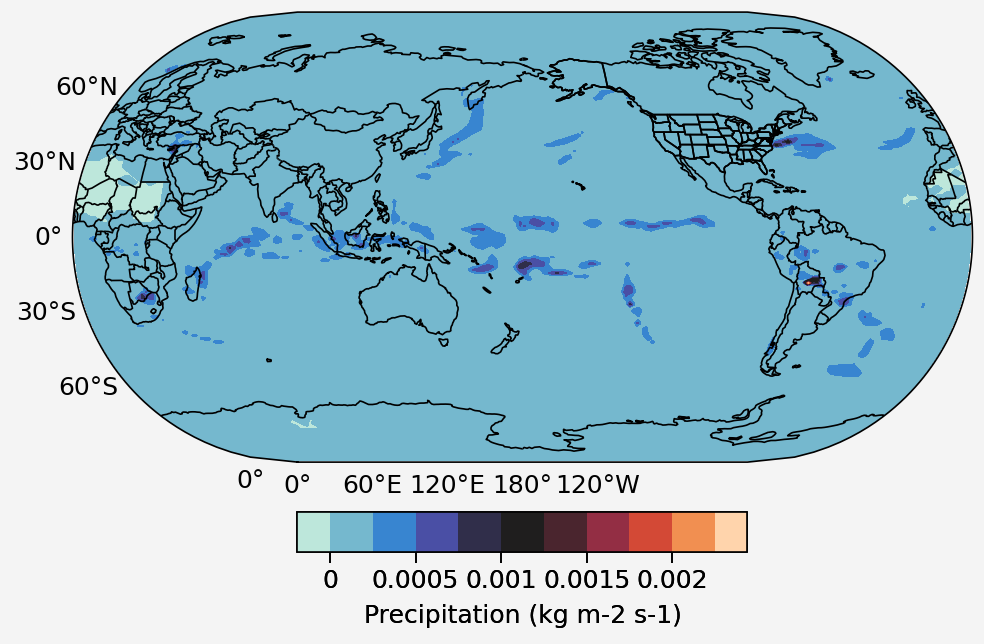

In [ ]:
fig, ax = plot.subplots(axwidth=4.5, tight=True, proj='eck3', proj_kw={"lon_0": 180},)

ax.format(land=False, coast=True, innerborders=True, borders=True, labels=True, geogridlinewidth=0,)

map1 = ax.contourf(ds["lon"], ds["lat"], ds["pr"][0,0,:,:], cmap="IceFire", extend="both")

ax.colorbar(map1, loc="b", shrink=0.5, extendrect=True)

plt.show()

For a single point in space:

In [83]:
prec_one_point = df.loc[(df.index.get_level_values("lat") == -89.375) & (df.index.get_level_values("lon") == 0.9375)]

In [84]:
first_band = prec_one_point[:1980] # Separate the bands so we can look at them
second_band = prec_one_point[1980:]

first_band

lat_bnds  lon_bnds  \
lat     bnds lon    member_id time                                      
-89.375 0    0.9375 r1i1p1f2  1850-01-16 00:00:00     -90.0       0.0   
                              1850-02-16 00:00:00     -90.0       0.0   
                              1850-03-16 00:00:00     -90.0       0.0   
                              1850-04-16 00:00:00     -90.0       0.0   
                              1850-05-16 00:00:00     -90.0       0.0   
...                                                     ...       ...   
                              2014-08-16 00:00:00     -90.0       0.0   
                              2014-09-16 00:00:00     -90.0       0.0   
                              2014-10-16 00:00:00     -90.0       0.0   
                              2014-11-16 00:00:00     -90.0       0.0   
                              2014-12-16 00:00:00     -90.0       0.0   

                                                             pr  \
lat     bnds lon    member_id time                                
-89.375 0    0.9375 r1i1p1f2  1850-01-16 00:00:00  2.528526e-06   
                              1850-02-16 00:00:00  1.196780e-06   
                              1850-03-16 00:00:00  3.137424e-07   
                              1850-04-16 00:00:00  1.142245e-06   
                              1850-05-16 00:00:00  1.526145e-06   
...                                                         ...   
                              2014-08-16 00:00:00  1.995737e-06   
                              2014-09-16 00:00:00  2.168923e-06   
                              2014-10-16 00:00:00  2.798138e-06   
                              2014-11-16 00:00:00  3.432269e-06   
                              2014-12-16 00:00:00  1.107220e-06   

                                                             time_bnds  
lat     bnds lon    member_id time                                      
-89.375 0    0.9375 r1i1p1f2  1850-01-16 00:00:00  1850-01-01 00:00:00  
                              1850-02-16 00:00:00  1850-02-01 00:00:00  
                              1850-03-16 00:00:00  1850-03-01 00:00:00  
                              1850-04-16 00:00:00  1850-04-01 00:00:00  
                              1850-05-16 00:00:00  1850-05-01 00:00:00  
...                                                                ...  
                              2014-08-16 00:00:00  2014-08-01 00:00:00  
                              2014-09-16 00:00:00  2014-09-01 00:00:00  
                              2014-10-16 00:00:00  2014-10-01 00:00:00  
                              2014-11-16 00:00:00  2014-11-01 00:00:00  
                              2014-12-16 00:00:00  2014-12-01 00:00:00  

[1980 rows x 4 columns]

In [85]:
second_band

lat_bnds  lon_bnds  \
lat     bnds lon    member_id time                                      
-89.375 1    0.9375 r1i1p1f2  1850-01-16 00:00:00    -88.75     1.875   
                              1850-02-16 00:00:00    -88.75     1.875   
                              1850-03-16 00:00:00    -88.75     1.875   
                              1850-04-16 00:00:00    -88.75     1.875   
                              1850-05-16 00:00:00    -88.75     1.875   
...                                                     ...       ...   
                              2014-08-16 00:00:00    -88.75     1.875   
                              2014-09-16 00:00:00    -88.75     1.875   
                              2014-10-16 00:00:00    -88.75     1.875   
                              2014-11-16 00:00:00    -88.75     1.875   
                              2014-12-16 00:00:00    -88.75     1.875   

                                                             pr  \
lat     bnds lon    member_id time                                
-89.375 1    0.9375 r1i1p1f2  1850-01-16 00:00:00  2.528526e-06   
                              1850-02-16 00:00:00  1.196780e-06   
                              1850-03-16 00:00:00  3.137424e-07   
                              1850-04-16 00:00:00  1.142245e-06   
                              1850-05-16 00:00:00  1.526145e-06   
...                                                         ...   
                              2014-08-16 00:00:00  1.995737e-06   
                              2014-09-16 00:00:00  2.168923e-06   
                              2014-10-16 00:00:00  2.798138e-06   
                              2014-11-16 00:00:00  3.432269e-06   
                              2014-12-16 00:00:00  1.107220e-06   

                                                             time_bnds  
lat     bnds lon    member_id time                                      
-89.375 1    0.9375 r1i1p1f2  1850-01-16 00:00:00  1850-02-01 00:00:00  
                              1850-02-16 00:00:00  1850-03-01 00:00:00  
                              1850-03-16 00:00:00  1850-04-01 00:00:00  
                              1850-04-16 00:00:00  1850-05-01 00:00:00  
                              1850-05-16 00:00:00  1850-06-01 00:00:00  
...                                                                ...  
                              2014-08-16 00:00:00  2014-09-01 00:00:00  
                              2014-09-16 00:00:00  2014-10-01 00:00:00  
                              2014-10-16 00:00:00  2014-11-01 00:00:00  
                              2014-11-16 00:00:00  2014-12-01 00:00:00  
                              2014-12-16 00:00:00  2015-01-01 00:00:00  

[1980 rows x 4 columns]

In [86]:
first_band.columns

Index(['lat_bnds', 'lon_bnds', 'pr', 'time_bnds'], dtype='object')

Below we do two things:
1. Replace the `cftime.Datetime360Day` type in `time_bnds` with an integer that represents the number of days elapsed since Jan 1st, 1850.
2. Set the index of the `DataFrame` to be `time_bnds`. Since this is a single spatial measurement, all we care about is the time. This will discard the existing `MultiIndex` of the original data.

In [87]:
first_band["time_bnds"] = [cftime.date2num(ind, "days since 1850-01-01") for ind in first_band["time_bnds"]]
second_band["time_bnds"] = [cftime.date2num(ind, "days since 1850-01-01") for ind in second_band["time_bnds"]]

# first_band = first_band.set_index("time_bnds")
# second_band = second_band.set_index("time_bnds")

<AxesSubplot:xlabel='time_bnds', ylabel='pr'>

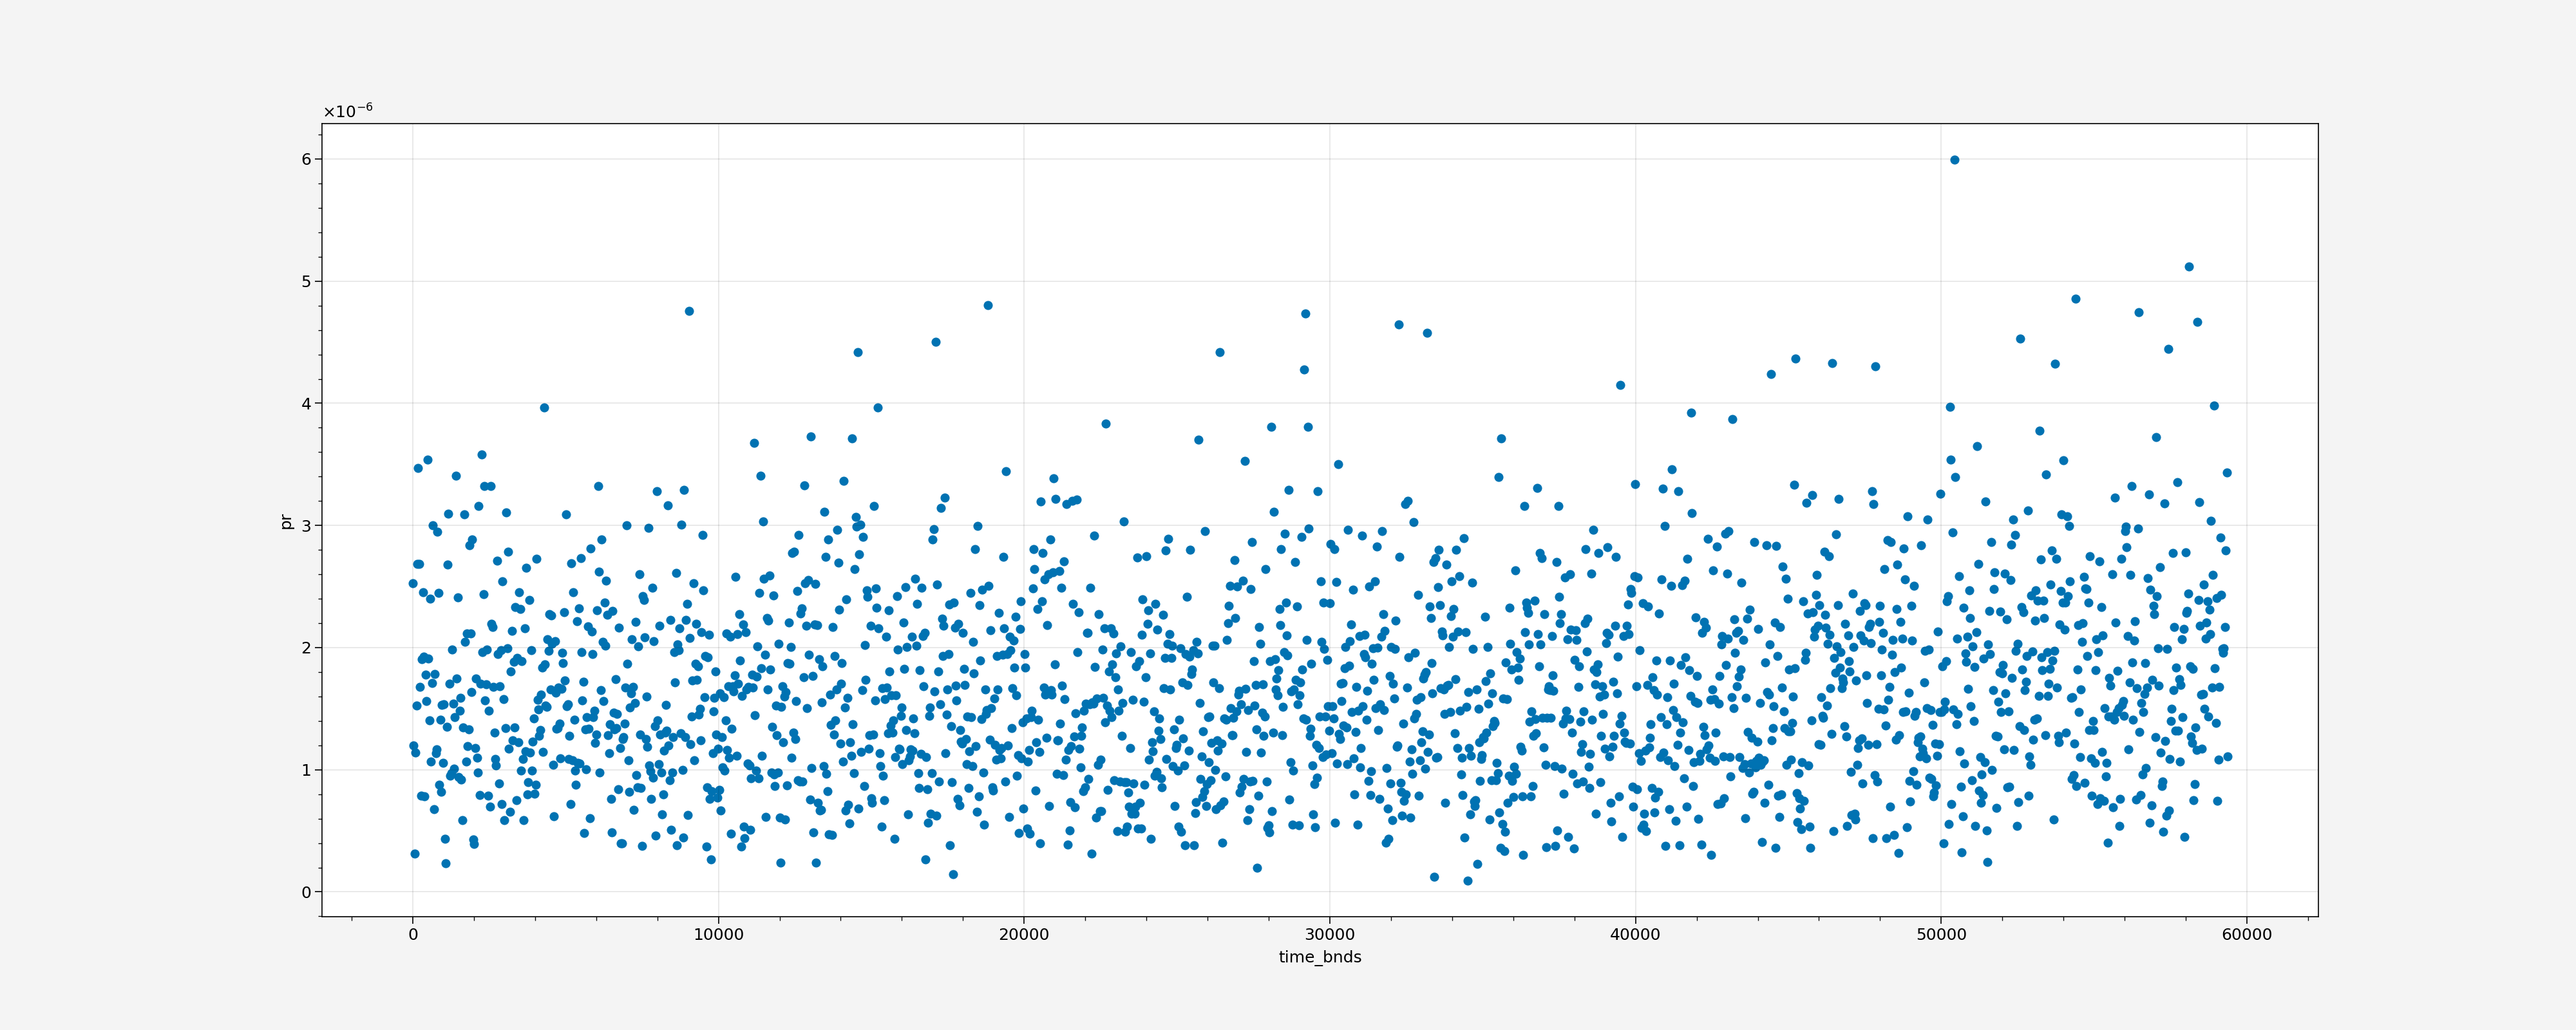

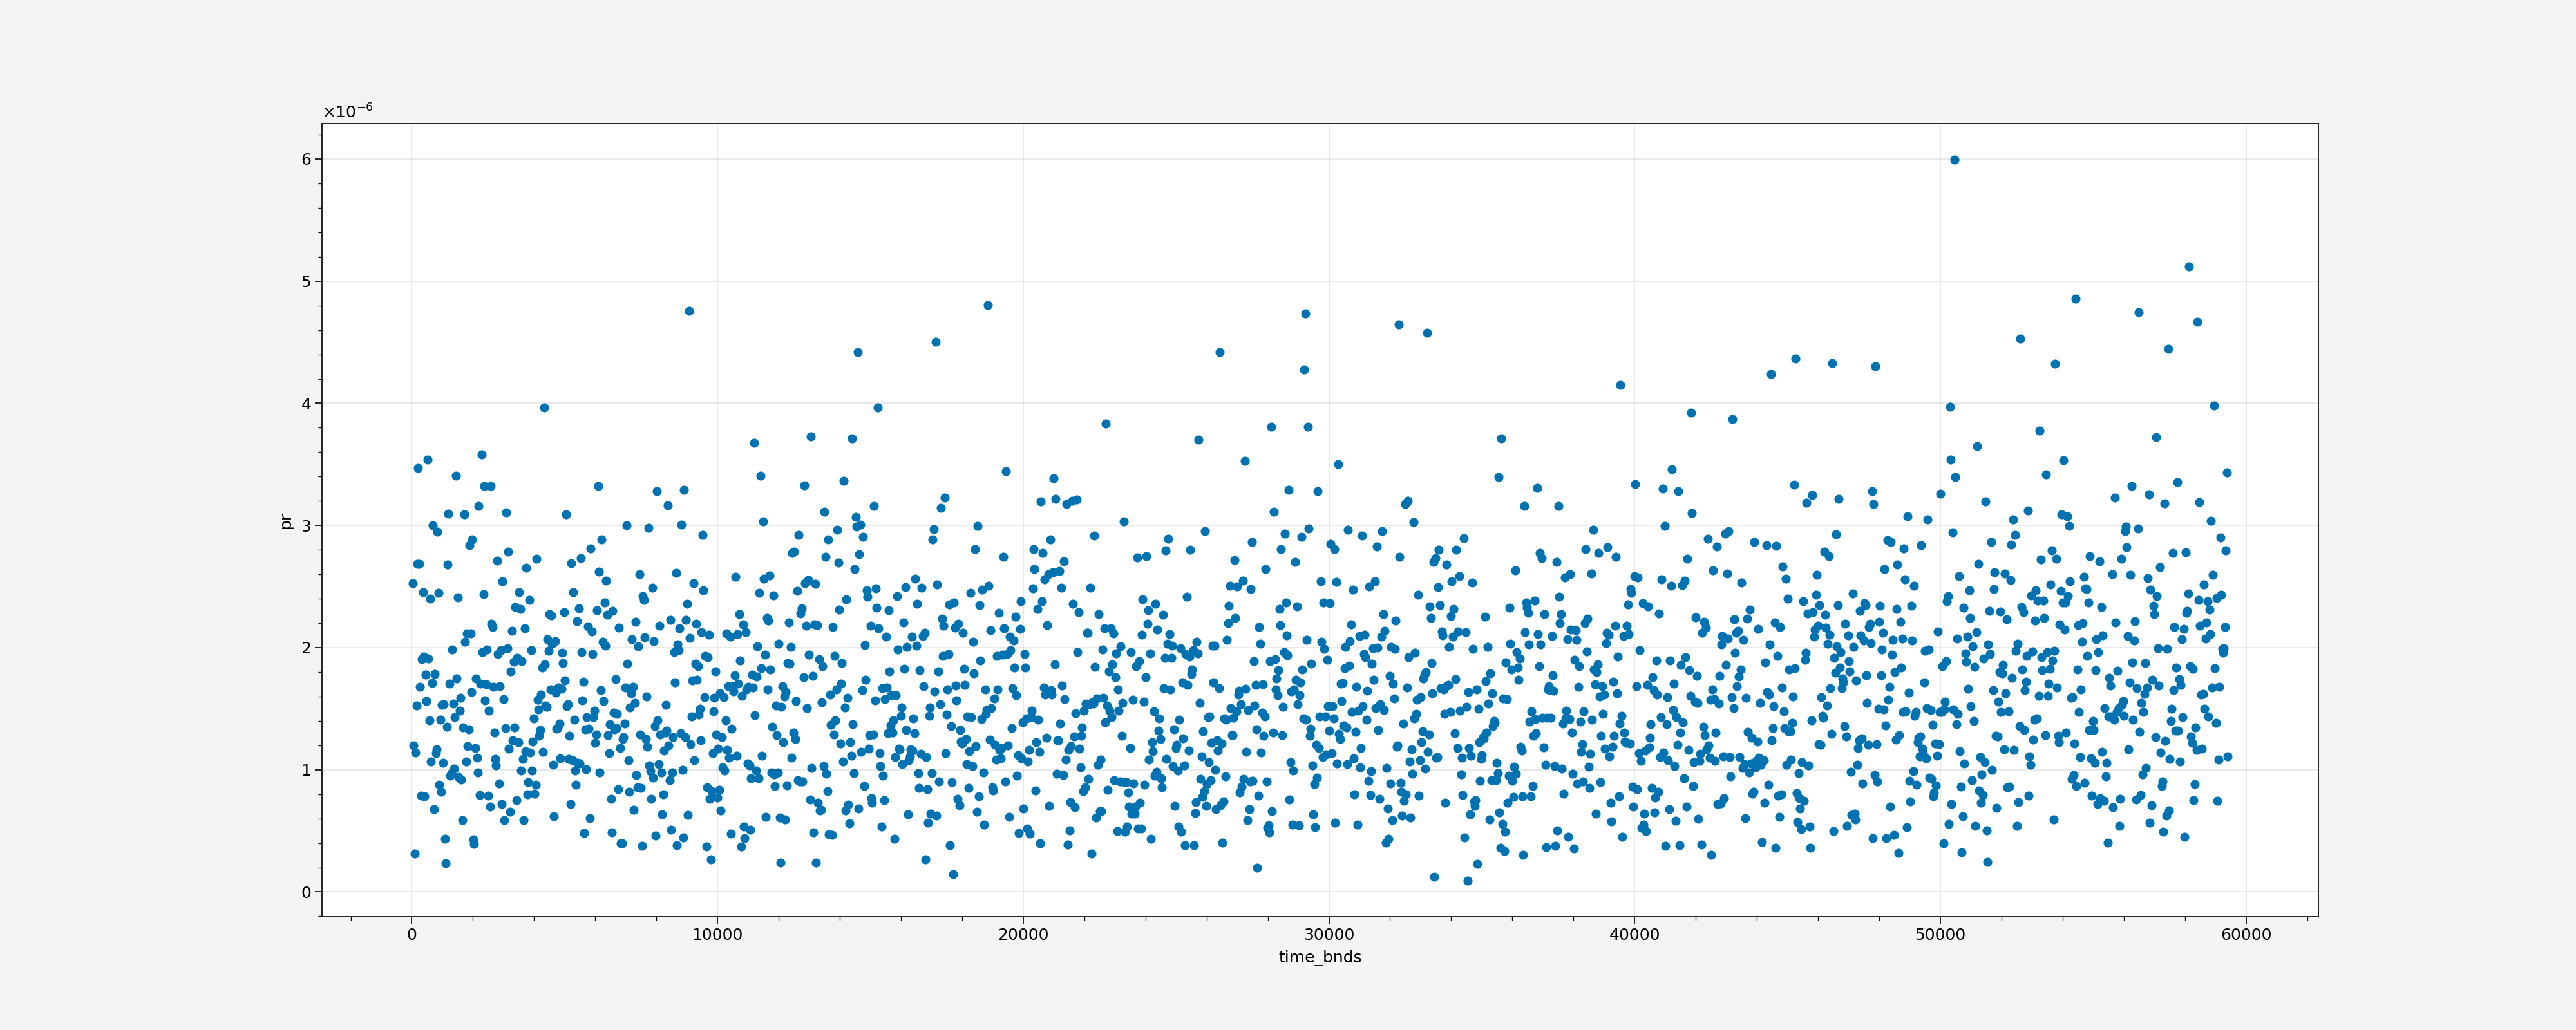

In [88]:
first_band.plot(x="time_bnds", y="pr", kind="scatter", figsize=(20, 8))
second_band.plot(x="time_bnds", y="pr", kind="scatter", figsize=(20, 8))

If I'm just eyeballing, these look the same to me. I'd have to try and overlay them to know for sure, and it's not necessarily that important to know — I might just discard one of the bands all the time.

Let's try zooming in a bit.

<AxesSubplot:xlabel='time_bnds', ylabel='pr'>

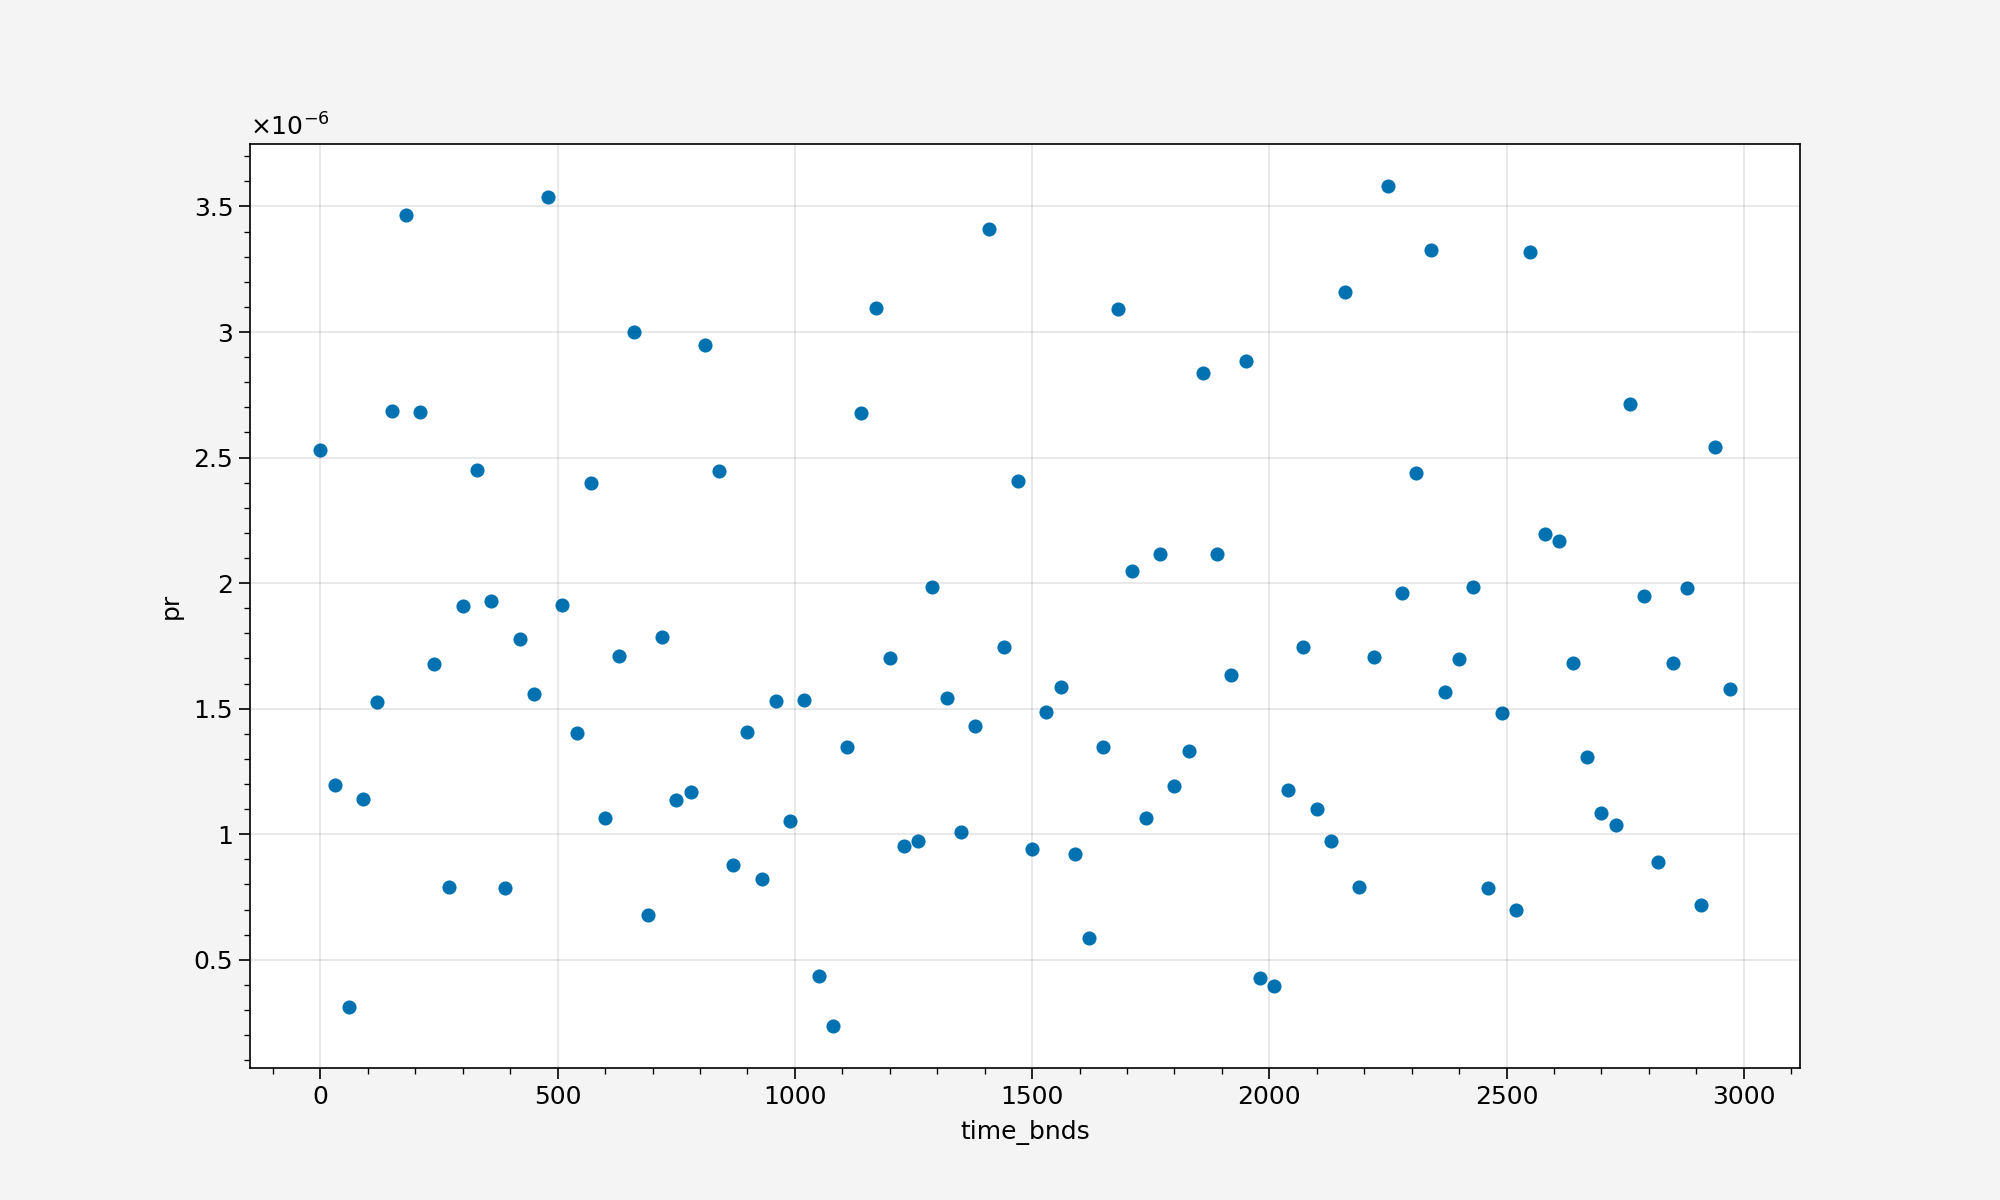

In [92]:
first_band[:100].plot(x="time_bnds", y="pr", kind="scatter", figsize=(10, 6))

In [97]:
time_x = first_band["time_bnds"].to_numpy()
prec_y = first_band["pr"].to_numpy()

In [98]:
time_x[0], prec_y[0]

(0, 2.5285256e-06)

In [103]:
with open("data.csv", "w") as out:
    out.writelines(f"time,prec\n")
    for x, y in zip(time_x, prec_y):
        out.writelines(f"{x},{y}\n")